<a href="https://colab.research.google.com/github/josephinepurek/Heart_Disease_Prediction/blob/main/Heart_Disease_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Veronika Josephine Purek  
### Dataset: https://www.kaggle.com/johnsmith88/heart-disease-dataset  
### Topic: "**Heart Disease Prediction**"

# Import Package

In [165]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
#from pprint import pprint

# Import Data

In [166]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [167]:
%cd /content/gdrive/MyDrive/Data Science Bootcamp/Day 2

/content/gdrive/MyDrive/Data Science Bootcamp/Day 2


In [168]:
#Read dataset
df = pd.read_csv('heart.csv',encoding ='latin')

In [169]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [170]:
#Display 10 rows randomly
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
645,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
232,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
743,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
401,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
777,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
736,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
411,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
701,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
202,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1


# Data Interpretation

Attributes information:
1. `age` - age (in years) of each respondent (corresponding one on one with the row)
2. `sex` - gender of each respondent (1 = male ; 0 = female)
3. `cp` - chest pain type (4 values):  
Value 0 "typical angina"  
Value 1 "atypical angina"  
Value 2 "non-anginal pain"  
Value 3 "asymptomatic"
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
5. `chol` - serum cholestoral in mg/dl
6. `fbs` - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. `restecg` - resting electrocardiographic results (values 0,1,2)   
Value 0 "normal"  
Value 1 "having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)"  
Value 2 "showing probable or definite left ventricular hypertrophy by Estes' criteria" 
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest
11. `slope` - the slope of the peak exercise ST segment   
Value 0 "upsloping"  
Value 1 "flat"  
Value 2 "downsloping"
12. `ca` - number of major vessels (0-4) colored by flourosopy
13. `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect

Continuous variable: `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`

In [171]:
#Get dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [172]:
#Get summary statistics for numerical columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- There are 1025 rows of data with 14 columns
- The target variable is `target`. Valued as follows: 0 = no heart disease ; 1 = heart disease.

# Data Cleaning

## Missing Values Handling

In [173]:
#Check null values of every attributes
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We found that there's no missing values in these dataset. But to make sure before jumping on next step, we will try to summarize unique values of each attribute.

In [174]:
#Get unique values for each of the column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)
    print()

Column: age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

Column: sex
[1 0]

Column: cp
[0 1 2 3]

Column: trestbps
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

Column: chol
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 

Since, there is no "weird" values that can be categorized as missing values, we will perform next step to check on duplicate row on the dataset.

## Duplicate Rows Handling

In [175]:
len(df.drop_duplicates()) / len(df)

0.2946341463414634

There are duplicate rows in this dataset, hence we will drop those duplicated rows.

In [176]:
df = df.drop_duplicates()

## Outlier Analysis

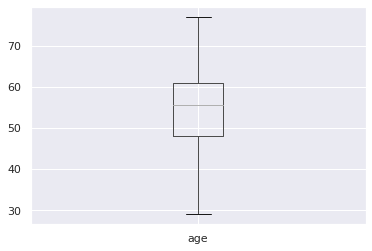

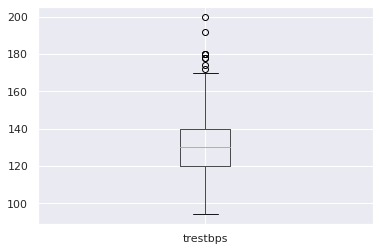

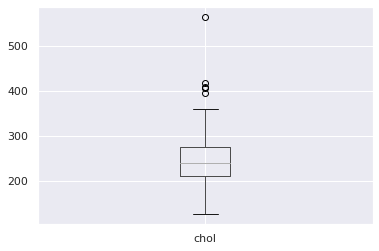

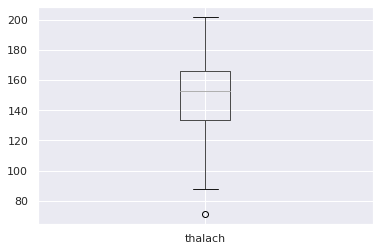

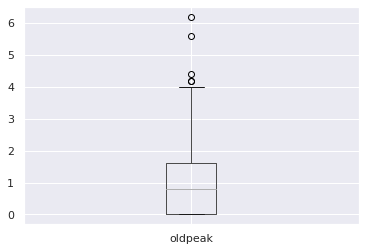

In [177]:
cont_attribute = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i in cont_attribute:
    df[[i]].boxplot()
    plt.show();

We found that in features `trestbps`, `chol`, `thalach`, and `oldpeak`, there are some outliers data.  
For `thalach`, since the gap to lower limit (minimum) of the boxplot is not too big, we will use the data as it is and will not manipulate it (or do outliers handling) by capping the data, since we handled sensitive data related to health. We will conduct further checking on the rest of those features.

### `trestbps` Analysis

In [178]:
IQR = df['trestbps'].quantile(.75) - df['trestbps'].quantile(.25)
df_upper_outliers = df[df['trestbps'] > 1.5 * IQR + df['trestbps'].quantile(.75)]
df_normal = df[df['trestbps'] <= 1.5 * IQR + df['trestbps'].quantile(.75)]

In [179]:
df_upper_outliers.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,59.222222,0.444444,0.888889,181.555556,271.444444,0.444444,0.666667,151.555556,0.666667,1.633333,1.111111,0.555556,2.666667,0.333333
std,5.629782,0.527046,1.166667,8.875685,41.848271,0.527046,0.707107,21.909536,0.500000,1.767767,0.781736,0.881917,0.500000,0.500000
min,52.000000,0.000000,0.000000,172.000000,199.000000,0.000000,0.000000,117.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,55.000000,0.000000,0.000000,178.000000,249.000000,0.000000,0.000000,143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,59.000000,0.000000,0.000000,180.000000,274.000000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,64.000000,1.000000,2.000000,180.000000,288.000000,1.000000,1.000000,162.000000,1.000000,3.400000,2.000000,1.000000,3.000000,1.000000
max,68.000000,1.000000,3.000000,200.000000,327.000000,1.000000,2.000000,195.000000,1.000000,4.200000,2.000000,2.000000,3.000000,1.000000


In [180]:
df_normal.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.273038,0.689420,0.965870,130.068259,245.733788,0.139932,0.522184,149.508532,0.317406,1.024915,1.406143,0.723549,2.303754,0.549488
std,9.098803,0.463523,1.029794,15.380186,51.896341,0.347510,0.520490,22.966565,0.466263,1.137481,0.610044,1.011251,0.613674,0.498396
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


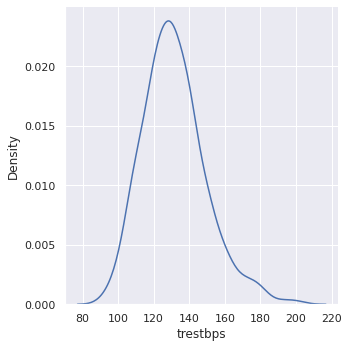

In [181]:
sns.displot(data=df,
            x='trestbps',
            kind='kde')

It is clear that samples that are considered as outliers based on the `trestbps` column have small different data distribution with samples that are considered as normal.  
Furthermore, we know that those "outliers" datapoint is only apart some metric units from the boxplot maximum line. Also we can see in the kde plot, that those "outliers" data actually is a part of the data's right tail. Thus, we still can keep the data for our model.

### `chol` Analysis

In [182]:
IQR = df['chol'].quantile(.75) - df['chol'].quantile(.25)
df_upper_outliers = df[df['chol'] > 1.5 * IQR + df['chol'].quantile(.75)]
df_normal = df[df['chol'] <= 1.5 * IQR + df['chol'].quantile(.75)]

In [183]:
df_upper_outliers.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000
mean,62.600000,0.0,0.800000,135.800000,438.200000,0.200000,0.0,155.600000,0.200000,1.90000,1.200000,1.20000,2.600000,0.600000
std,4.159327,0.0,1.095445,12.969194,70.807485,0.447214,0.0,3.781534,0.447214,1.24499,0.447214,1.30384,0.547723,0.547723
min,56.000000,0.0,0.000000,115.000000,394.000000,0.000000,0.0,150.000000,0.000000,0.80000,1.000000,0.00000,2.000000,0.000000
25%,62.000000,0.0,0.000000,134.000000,407.000000,0.000000,0.0,154.000000,0.000000,1.20000,1.000000,0.00000,2.000000,0.000000
50%,63.000000,0.0,0.000000,140.000000,409.000000,0.000000,0.0,157.000000,0.000000,1.60000,1.000000,1.00000,3.000000,1.000000
75%,65.000000,0.0,2.000000,140.000000,417.000000,0.000000,0.0,157.000000,0.000000,1.90000,1.000000,2.00000,3.000000,1.000000
max,67.000000,0.0,2.000000,150.000000,564.000000,1.000000,0.0,160.000000,1.000000,4.00000,2.000000,3.00000,3.000000,1.000000


In [184]:
df_normal.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.282828,0.693603,0.966330,131.531987,243.272727,0.148148,0.535354,149.468013,0.329966,1.028620,1.400673,0.710438,2.309764,0.542088
std,9.047966,0.461775,1.032681,17.638252,44.996731,0.355846,0.525944,23.078446,0.470994,1.156805,0.618739,1.001852,0.613755,0.499066
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


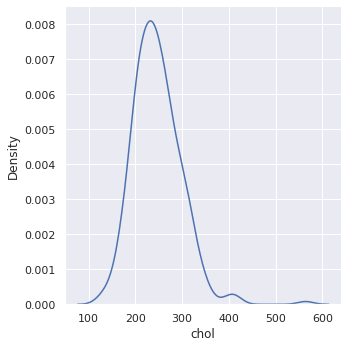

In [185]:
sns.displot(data=df,
            x='chol',
            kind='kde')

We can see that samples that are considered as outliers based on the `chol` column have a similar data distribution with samples that are considered as normal. But we can see that for some features like `chol`, `oldpeak`, and `ca` there are a huge different for the data distribution. Through the KDE plot, we know that those different distribution may be impacted by the data distribution in which we identify as a long range of data's right tail. Based on this fact, we decide to keep the data and use the data as a base to build our model.

### `oldpeak` Analysis

In [186]:
IQR = df['oldpeak'].quantile(.75) - df['oldpeak'].quantile(.25)
df_upper_outliers = df[df['oldpeak'] > 1.5 * IQR + df['oldpeak'].quantile(.75)]
df_normal = df[df['oldpeak'] <= 1.5 * IQR + df['oldpeak'].quantile(.75)]

In [187]:
df_upper_outliers.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,5.0000,5.000000,5.000000,5.000000,5.00000,5.0,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,57.0000,0.800000,0.600000,146.400000,253.40000,0.0,0.80000,132.600000,0.400000,4.920000,0.200000,1.800000,2.600000,0.200000
std,4.1833,0.447214,1.341641,24.058263,62.75986,0.0,0.83666,15.339492,0.547723,0.923038,0.447214,1.643168,0.894427,0.447214
min,51.0000,0.000000,0.000000,114.000000,164.00000,0.0,0.00000,111.000000,0.000000,4.200000,0.000000,0.000000,1.000000,0.000000
25%,55.0000,1.000000,0.000000,140.000000,217.00000,0.0,0.00000,122.000000,0.000000,4.200000,0.000000,0.000000,3.000000,0.000000
50%,58.0000,1.000000,0.000000,140.000000,270.00000,0.0,1.00000,140.000000,0.000000,4.400000,0.000000,3.000000,3.000000,0.000000
75%,59.0000,1.000000,0.000000,160.000000,298.00000,0.0,1.00000,145.000000,1.000000,5.600000,0.000000,3.000000,3.000000,0.000000
max,62.0000,1.000000,3.000000,178.000000,318.00000,0.0,2.00000,145.000000,1.000000,6.200000,1.000000,3.000000,3.000000,1.000000


In [188]:
df_normal.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.377104,0.680135,0.969697,131.353535,246.383838,0.151515,0.521886,149.855219,0.326599,0.977778,1.417508,0.700337,2.309764,0.548822
std,9.104826,0.467211,1.027867,17.381051,51.668389,0.359155,0.520225,22.919570,0.469761,1.049796,0.599067,0.986959,0.608225,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


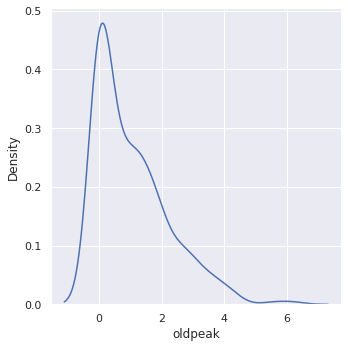

In [189]:
sns.displot(data=df,
            x='oldpeak',
            kind='kde')

We can see that samples that are considered as outliers based on the `chol` column have a huge different data distribution with samples that are considered as normal. Almost 50% features in the dataset are different. Furthermore, we can see through the KDE plot, that the data is right-skewed. Thus, we decide to drop the outliers and use the rest of the data for the next step.

### Drop Outliers

In [190]:
df = df[df['oldpeak'] <= 1.5 * IQR + df['oldpeak'].quantile(.75)]

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


# Exploratory Data Analysis

## Target Feature Analysis

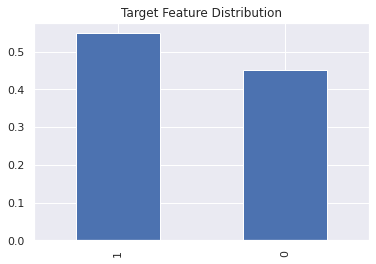

In [192]:
df['target'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

We can conclude that our data is still balancedly distributed (55:45) 

## Correlation Analysis

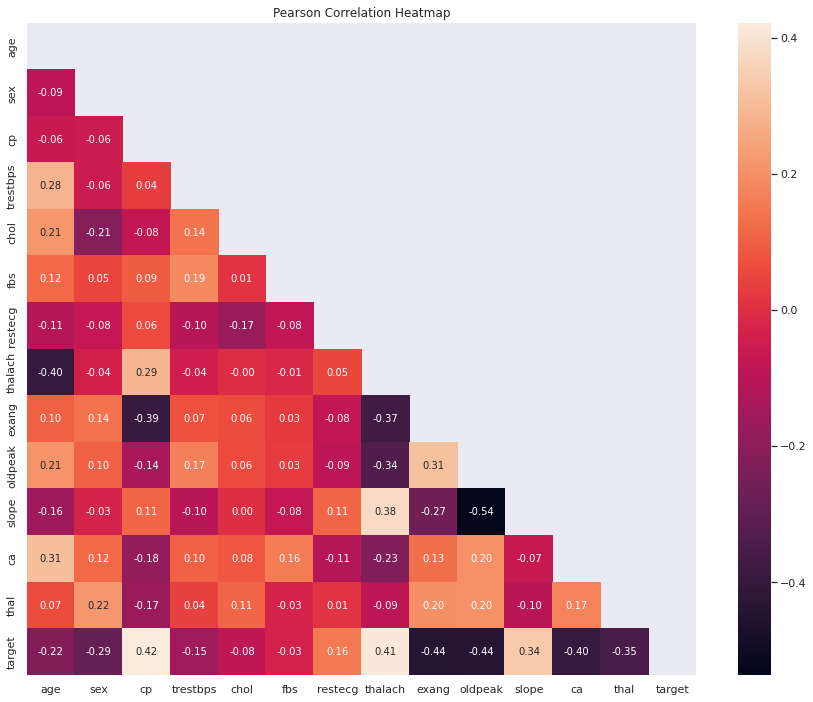

In [193]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Based on the generated plot, if we use 0.4 as threshold for strong correlation, then we can conclude that:  
1. features `cp`, `thalach`, `exang`, `oldpeak`, and `ca` have strong correlation with the target variable (heart disease existence in patient)
2. there is multicollinearity between feature `thalach` & `age` and features `slope` and `oldpeak`.

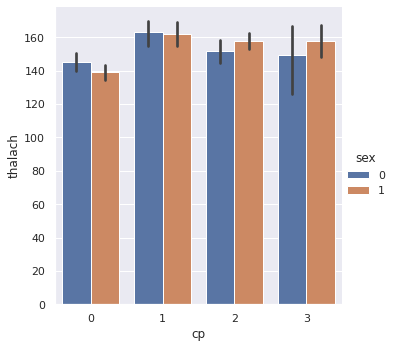

In [194]:
sns.catplot(data=df, x='cp',
            y='thalach', hue='sex',
            kind='bar')

Based on the plot we know that maximum heart rate achieved by each person is slightly different by type of chest pain that they had. But we must remember that in health case, there is no single factor that can affect a variable, because there is more likely some interactions between variables which finally lead into an event (result) related to the case.

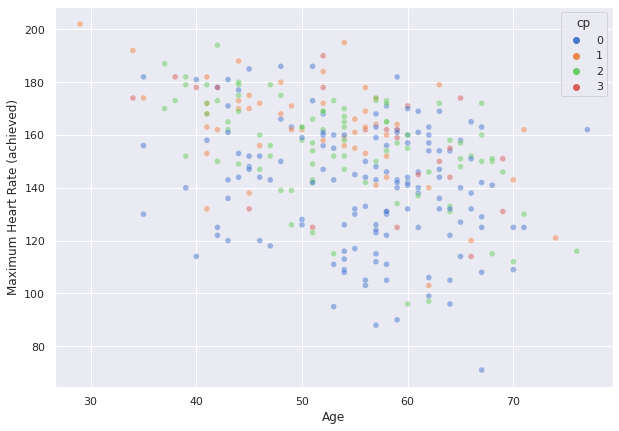

In [195]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes() 

sns.scatterplot(x="age", y="thalach", hue="cp" 
                
                , sizes=(40, 400), alpha=.5, palette="muted",
            data=df, ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Maximum Heart Rate (achieved)')

plt.show()

Based on the data we know that there is a pattern: while age increase, the maximum heart rate per minute that can be achieved is decreasing. Nevertheless, we need to consider that the person physical activity rate and many other factors such as nutrition can affect the maximum heart rate that can be achieved.  
To conclude, in health industry, there is not only interaction between two or three variables that can affect a target variable, but it can be more. This case often result in low correlation between a single variable to the target factors. Thus, low correlation between single variable does not always trigger a warning when build ML Model, we need to consider that there is interaction between predictor that probably can lead us to higher model accuracy score.

# Machine Learning Model

## Split Dataset

In [196]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [197]:
scaler = StandardScaler()
logreg = LogisticRegression()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

logreg.fit(X_train_std, y_train)
y_pred_lr = logreg.predict(X_test_std)

accuracy_score(y_test,y_pred_lr)*100

86.66666666666667

## Naive-Bayes

In [198]:
gaussNB = GaussianNB()
gaussNB.fit(X_train,y_train)
y_pred_NB = gaussNB.predict(X_test)

accuracy_score(y_test,y_pred_NB)*100

85.0

## SVC

In [199]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

accuracy_score(y_test,y_pred_svc)*100

66.66666666666666

## Random Forest

In [200]:
randforest = RandomForestClassifier()
randforest.fit(X_train, y_train)

y_pred_rf = randforest.predict(X_test)

accuracy_score(y_test,y_pred_svc)*100

66.66666666666666

## Decision Tree

In [201]:
dectree = tree.DecisionTreeClassifier()
dectree.fit(X_train, y_train)

y_pred_dt = dectree.predict(X_test)

accuracy_score(y_test,y_pred_dt)*100

78.33333333333333

## Model Summary

Based on the built models, we found that for this case, logistic regression model has the bigger accuracy score, 86.7%. Thus, we will use this model as our model to predict the heart disease existence in our case.